## STATISTICAL ANALYSIS FOR PCM DATA

In [1]:
import os
import pandas as pd
from tqdm import tqdm  # for progress bar (optional)

## Preprocess

In [2]:
def combine_pcm_data(folders, target_cores=[3, 4, 5]):
    """
    Combine PCM data from multiple folders into a single DataFrame.
    
    Args:
        folders (list): List of folder paths containing PCM CSV files
        target_cores (list): List of core numbers to focus on (default: [3, 4, 5])
    
    Returns:
        pd.DataFrame: Combined DataFrame with all test data
    """
    all_data = []
    
    for folder in tqdm(folders, desc="Processing folders"):
        # Get all CSV files in the folder
        csv_files = [f for f in os.listdir(folder) if f.endswith('.csv') and f.startswith('pcm_core_')]
        
        for csv_file in tqdm(csv_files, desc=f"Processing files in {folder}", leave=False):
            # Extract TestID from filename
            test_id = csv_file.replace('pcm_core_', '').replace('.csv', '')
            
            # Read CSV file
            file_path = os.path.join(folder, csv_file)
            try:
                df = pd.read_csv(file_path)
                
                # Add metadata columns
                df['Test_ID'] = test_id
                df['FolderID'] = os.path.basename(folder)
                df['UniqueID'] = df['Test_ID'].astype(str) + "_" + df['FolderID']
                
                # Add time step column (1-40)
                df['Time_Step'] = range(1, len(df) + 1)
                
                # Filter for target cores if specified
                if target_cores:
                    # Get all columns that match target cores
                    core_cols = []
                    for core in target_cores:
                        core_cols.extend([col for col in df.columns if f'Core{core}' in col])
                    
                    # Keep only system columns and target core columns
                    system_cols = [col for col in df.columns if 'System' in col or 'SKT0' in col]
                    keep_cols = system_cols + core_cols + ['Test_ID', 'FolderID', 'UniqueID', 'Time_Step']
                    df = df[keep_cols]
                
                all_data.append(df)
                
            except Exception as e:
                print(f"Error processing {file_path}: {str(e)}")
                continue
    
    # Combine all DataFrames
    if all_data:
        combined_df = pd.concat(all_data, ignore_index=True)
        
        # Convert date/time to datetime object if exists
        if 'System - Date' in combined_df.columns and 'System - Time' in combined_df.columns:
            combined_df['DateTime'] = pd.to_datetime(
                combined_df['System - Date'] + ' ' + combined_df['System - Time']
            )
            # Drop original date/time columns if desired
            # combined_df.drop(['System - Date', 'System - Time'], axis=1, inplace=True)
        
        return combined_df
    else:
        return pd.DataFrame()  # Return empty DataFrame if no data processed




# Save to CSV if needed
# combined_data.to_csv('combined_pcm_data.csv', index=False)

In [3]:
# Example usage:
folders = ["Memento_V01", "Memento_V02", "Memento_V03", "Memento_V04",
           "Memento_V02_3_MixedScenarios", "Memento_V01_mix_scenarios", 
           "TheGame_V01", "TheGame_V02", "TheGame_V02_2", 
           "TheGame_V03", "TheGame_V04", "TheGame_MIX_V01", "TheGame_MIX_V02"]

# Assuming the folders are in the current directory - modify paths as needed


# Get combined data (focusing on cores 3,4,5 by default)
combined_data = combine_pcm_data(folders)
# size of the combined data
print(f"Combined data size: {combined_data.shape}")

Processing folders: 100%|██████████| 13/13 [00:10<00:00,  1.20it/s]


Combined data size: (102407, 37)


In [4]:
# Display first 100 rows of combined data
display(combined_data.head(100))  # Display first few rows of combined data

,System - Date,System - Time,System Core C-States - C0res%,System Core C-States - C1res%,System Core C-States - C6res%,SKT0 Core C-State - C0res%,SKT0 Core C-State - C1res%,SKT0 Core C-State - C6res%,Core3 (Socket 0) - IPC,Core3 (Socket 0) - L3MISS,...,Core5 (Socket 0) - C0res%,Core5 (Socket 0) - C1res%,Core5 (Socket 0) - C6res%,Core5 (Socket 0) - PhysIPC,Core5 (Socket 0) - PhysIPC%,Test_ID,FolderID,UniqueID,Time_Step,DateTime
0,2025-07-01,09:47:02.180,1.13,91.81,0.0,1.13,91.81,0.0,1.15,0.01,...,1.32,93.47,0.0,2.98,59.54,1replicas_scenario31_3000rps,Memento_V01,1replicas_scenario31_3000rps_Memento_V01,1,2025-07-01 09:47:02.180
1,2025-07-01,09:47:07.181,1.31,98.69,0.0,1.31,98.69,0.0,0.69,0.01,...,0.79,99.21,0.0,1.95,39.01,1replicas_scenario31_3000rps,Memento_V01,1replicas_scenario31_3000rps_Memento_V01,2,2025-07-01 09:47:07.181
2,2025-07-01,09:47:12.181,1.18,98.82,0.0,1.18,98.82,0.0,0.70,0.01,...,2.07,97.93,0.0,3.74,74.84,1replicas_scenario31_3000rps,Memento_V01,1replicas_scenario31_3000rps_Memento_V01,3,2025-07-01 09:47:12.181
3,2025-07-01,09:47:17.181,1.33,98.67,0.0,1.33,98.67,0.0,0.71,0.02,...,0.89,99.11,0.0,2.32,46.50,1replicas_scenario31_3000rps,Memento_V01,1replicas_scenario31_3000rps_Memento_V01,4,2025-07-01 09:47:17.181
4,2025-07-01,09:47:22.181,1.30,98.70,0.0,1.30,98.70,0.0,1.52,0.02,...,0.83,99.17,0.0,1.77,35.32,1replicas_scenario31_3000rps,Memento_V01,1replicas_scenario31_3000rps_Memento_V01,5,2025-07-01 09:47:22.181
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2025-07-01,03:51:45.021,0.92,78.72,0.0,0.92,78.72,0.0,1.90,0.01,...,3.89,75.44,0.0,3.74,74.76,1replicas_scenario32_100rps,Memento_V01,1replicas_scenario32_100rps_Memento_V01,22,2025-07-01 03:51:45.021
96,2025-07-01,03:51:50.022,0.90,77.94,0.0,0.90,77.94,0.0,1.87,0.01,...,3.81,74.68,0.0,3.81,76.18,1replicas_scenario32_100rps,Memento_V01,1replicas_scenario32_100rps_Memento_V01,23,2025-07-01 03:51:50.022
97,2025-07-01,03:51:55.022,0.90,78.14,0.0,0.90,78.14,0.0,1.88,0.01,...,3.78,75.72,0.0,3.81,76.15,1replicas_scenario32_100rps,Memento_V01,1replicas_scenario32_100rps_Memento_V01,24,2025-07-01 03:51:55.022
98,2025-07-01,03:52:00.022,0.88,78.10,0.0,0.88,78.10,0.0,1.72,0.01,...,2.60,79.70,0.0,3.59,71.83,1replicas_scenario32_100rps,Memento_V01,1replicas_scenario32_100rps_Memento_V01,25,2025-07-01 03:52:00.022


In [5]:
# Display distict Test_IDs and their values
print(f"Distinct Test_IDs: {combined_data['Test_ID'].unique()}")
print(f"Distinct Test_IDs: {combined_data['Test_ID'].nunique()}")

Distinct Test_IDs: ['1replicas_scenario31_3000rps' '1replicas_scenario0_1500rps'
 '1replicas_scenario32_100rps' '1replicas_scenario21_3500rps'
 '1replicas_scenario1_2500rps' '1replicas_scenario32_4000rps'
 '1replicas_scenario23_2000rps' '1replicas_scenario31_500rps'
 '1replicas_scenario24_1500rps' '1replicas_scenario23_100rps'
 '1replicas_scenario13_500rps' '1replicas_scenario13_4000rps'
 '1replicas_scenario32_1500rps' '1replicas_scenario32_2500rps'
 '1replicas_scenario0_1000rps' '1replicas_scenario2_1500rps'
 '1replicas_scenario22_4000rps' '1replicas_scenario12_2500rps'
 '1replicas_scenario14_2000rps' '1replicas_scenario1_3500rps'
 '1replicas_scenario23_4000rps' '1replicas_scenario34_2000rps'
 '1replicas_scenario33_3500rps' '1replicas_scenario32_3000rps'
 '1replicas_scenario31_2500rps' '1replicas_scenario22_1500rps'
 '1replicas_scenario1_3000rps' '1replicas_scenario11_3000rps'
 '1replicas_scenario33_100rps' '1replicas_scenario34_3500rps'
 '1replicas_scenario13_3000rps' '1replicas_scen

## Data Enrichment

In [6]:
def enrich_data(df):
    """
    Add scenario labels, RPS, and interference metadata to the DataFrame.
    """
    df = df.copy()
    
    # Extract RPS from Test_ID
    df['RPS'] = df['Test_ID'].str.extract(r'(\d+)rps')[0].astype(float)
    
    # Extract scenario number
    df['Scenario_Num'] = df['Test_ID'].str.extract(r'scenario(\d+)')[0].astype(float)
    
    # Label scenarios based on interference type
    def generate_label(row):
        scenario_num = row['Scenario_Num']
        if scenario_num in [0, 1, 2, 3, 4]:
            return f"B{int(scenario_num)}"
        elif 11 <= scenario_num <= 14:
            return f"CPU{int(scenario_num - 10)}"
        elif 21 <= scenario_num <= 24:
            return f"L3_{int(scenario_num - 20)}"
        elif 31 <= scenario_num <= 34:
            return f"MEM{int(scenario_num - 30)}"
        elif 51 <= scenario_num <= 58:
            return f"MIX{int(scenario_num - 50)}"
        return "Unknown"
    
    df['Scenario_Label'] = df.apply(generate_label, axis=1)
    
    # Add interference type
    def get_interference_type(label):
        if label.startswith('B'):
            return 'Baseline'
        elif label.startswith('CPU'):
            return 'CPU'
        elif label.startswith('L3'):
            return 'L3'
        elif label.startswith('MEM'):
            return 'MEM'
        elif label.startswith('MIX'):
            return 'MIX'
        return 'Unknown'
    
    df['Interference_Type'] = df['Scenario_Label'].apply(get_interference_type)
    
    return df

In [7]:
enriched_data = enrich_data(combined_data)
# Display enriched data
print(f"Enriched data size: {enriched_data.shape}")

Enriched data size: (102407, 41)


In [8]:
display(enriched_data.head(100))  # Display first few rows of enriched data

,System - Date,System - Time,System Core C-States - C0res%,System Core C-States - C1res%,System Core C-States - C6res%,SKT0 Core C-State - C0res%,SKT0 Core C-State - C1res%,SKT0 Core C-State - C6res%,Core3 (Socket 0) - IPC,Core3 (Socket 0) - L3MISS,...,Core5 (Socket 0) - PhysIPC%,Test_ID,FolderID,UniqueID,Time_Step,DateTime,RPS,Scenario_Num,Scenario_Label,Interference_Type
0,2025-07-01,09:47:02.180,1.13,91.81,0.0,1.13,91.81,0.0,1.15,0.01,...,59.54,1replicas_scenario31_3000rps,Memento_V01,1replicas_scenario31_3000rps_Memento_V01,1,2025-07-01 09:47:02.180,3000.0,31.0,MEM1,MEM
1,2025-07-01,09:47:07.181,1.31,98.69,0.0,1.31,98.69,0.0,0.69,0.01,...,39.01,1replicas_scenario31_3000rps,Memento_V01,1replicas_scenario31_3000rps_Memento_V01,2,2025-07-01 09:47:07.181,3000.0,31.0,MEM1,MEM
2,2025-07-01,09:47:12.181,1.18,98.82,0.0,1.18,98.82,0.0,0.70,0.01,...,74.84,1replicas_scenario31_3000rps,Memento_V01,1replicas_scenario31_3000rps_Memento_V01,3,2025-07-01 09:47:12.181,3000.0,31.0,MEM1,MEM
3,2025-07-01,09:47:17.181,1.33,98.67,0.0,1.33,98.67,0.0,0.71,0.02,...,46.50,1replicas_scenario31_3000rps,Memento_V01,1replicas_scenario31_3000rps_Memento_V01,4,2025-07-01 09:47:17.181,3000.0,31.0,MEM1,MEM
4,2025-07-01,09:47:22.181,1.30,98.70,0.0,1.30,98.70,0.0,1.52,0.02,...,35.32,1replicas_scenario31_3000rps,Memento_V01,1replicas_scenario31_3000rps_Memento_V01,5,2025-07-01 09:47:22.181,3000.0,31.0,MEM1,MEM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2025-07-01,03:51:45.021,0.92,78.72,0.0,0.92,78.72,0.0,1.90,0.01,...,74.76,1replicas_scenario32_100rps,Memento_V01,1replicas_scenario32_100rps_Memento_V01,22,2025-07-01 03:51:45.021,100.0,32.0,MEM2,MEM
96,2025-07-01,03:51:50.022,0.90,77.94,0.0,0.90,77.94,0.0,1.87,0.01,...,76.18,1replicas_scenario32_100rps,Memento_V01,1replicas_scenario32_100rps_Memento_V01,23,2025-07-01 03:51:50.022,100.0,32.0,MEM2,MEM
97,2025-07-01,03:51:55.022,0.90,78.14,0.0,0.90,78.14,0.0,1.88,0.01,...,76.15,1replicas_scenario32_100rps,Memento_V01,1replicas_scenario32_100rps_Memento_V01,24,2025-07-01 03:51:55.022,100.0,32.0,MEM2,MEM
98,2025-07-01,03:52:00.022,0.88,78.10,0.0,0.88,78.10,0.0,1.72,0.01,...,71.83,1replicas_scenario32_100rps,Memento_V01,1replicas_scenario32_100rps_Memento_V01,25,2025-07-01 03:52:00.022,100.0,32.0,MEM2,MEM


In [9]:
# Print all columns
pd.set_option('display.max_columns', None)
display(enriched_data)

,System - Date,System - Time,System Core C-States - C0res%,System Core C-States - C1res%,System Core C-States - C6res%,SKT0 Core C-State - C0res%,SKT0 Core C-State - C1res%,SKT0 Core C-State - C6res%,Core3 (Socket 0) - IPC,Core3 (Socket 0) - L3MISS,Core3 (Socket 0) - L2MISS,Core3 (Socket 0) - C0res%,Core3 (Socket 0) - C1res%,Core3 (Socket 0) - C6res%,Core3 (Socket 0) - PhysIPC,Core3 (Socket 0) - PhysIPC%,Core4 (Socket 0) - IPC,Core4 (Socket 0) - L3MISS,Core4 (Socket 0) - L2MISS,Core4 (Socket 0) - C0res%,Core4 (Socket 0) - C1res%,Core4 (Socket 0) - C6res%,Core4 (Socket 0) - PhysIPC,Core4 (Socket 0) - PhysIPC%,Core5 (Socket 0) - IPC,Core5 (Socket 0) - L3MISS,Core5 (Socket 0) - L2MISS,Core5 (Socket 0) - C0res%,Core5 (Socket 0) - C1res%,Core5 (Socket 0) - C6res%,Core5 (Socket 0) - PhysIPC,Core5 (Socket 0) - PhysIPC%,Test_ID,FolderID,UniqueID,Time_Step,DateTime,RPS,Scenario_Num,Scenario_Label,Interference_Type
0,2025-07-01,09:47:02.180,1.13,91.81,0.0,1.13,91.81,0.0,1.15,0.01,0.46,1.96,87.98,0.0,2.31,46.18,1.69,0.01,0.31,2.55,90.81,0.0,3.39,67.73,1.49,0.01,0.17,1.32,93.47,0.0,2.98,59.54,1replicas_scenario31_3000rps,Memento_V01,1replicas_scenario31_3000rps_Memento_V01,1,2025-07-01 09:47:02.180,3000.0,31.0,MEM1,MEM
1,2025-07-01,09:47:07.181,1.31,98.69,0.0,1.31,98.69,0.0,0.69,0.01,0.57,1.72,98.28,0.0,1.39,27.79,1.93,0.01,0.28,4.47,95.53,0.0,3.85,77.05,0.98,0.01,0.21,0.79,99.21,0.0,1.95,39.01,1replicas_scenario31_3000rps,Memento_V01,1replicas_scenario31_3000rps_Memento_V01,2,2025-07-01 09:47:07.181,3000.0,31.0,MEM1,MEM
2,2025-07-01,09:47:12.181,1.18,98.82,0.0,1.18,98.82,0.0,0.70,0.01,0.56,1.69,98.31,0.0,1.39,27.90,1.30,0.01,0.41,1.98,98.02,0.0,2.60,52.04,1.87,0.01,0.16,2.07,97.93,0.0,3.74,74.84,1replicas_scenario31_3000rps,Memento_V01,1replicas_scenario31_3000rps_Memento_V01,3,2025-07-01 09:47:12.181,3000.0,31.0,MEM1,MEM
3,2025-07-01,09:47:17.181,1.33,98.67,0.0,1.33,98.67,0.0,0.71,0.02,0.58,1.73,98.27,0.0,1.42,28.33,1.89,0.01,0.32,4.27,95.71,0.0,3.79,75.79,1.16,0.01,0.20,0.89,99.11,0.0,2.32,46.50,1replicas_scenario31_3000rps,Memento_V01,1replicas_scenario31_3000rps_Memento_V01,4,2025-07-01 09:47:17.181,3000.0,31.0,MEM1,MEM
4,2025-07-01,09:47:22.181,1.30,98.70,0.0,1.30,98.70,0.0,1.52,0.02,0.47,3.17,96.83,0.0,3.03,60.67,1.71,0.01,0.33,2.95,97.05,0.0,3.43,68.58,0.88,0.01,0.21,0.83,99.17,0.0,1.77,35.32,1replicas_scenario31_3000rps,Memento_V01,1replicas_scenario31_3000rps_Memento_V01,5,2025-07-01 09:47:22.181,3000.0,31.0,MEM1,MEM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102402,2025-07-25,09:05:15.494,1.46,98.54,0.0,1.46,98.54,0.0,0.65,0.02,0.21,1.95,98.05,0.0,1.30,25.98,0.75,0.02,0.24,1.99,98.00,0.0,1.49,29.83,0.81,0.02,0.20,2.00,98.00,0.0,1.61,32.26,4replicas_scenario51_3000rps,TheGame_MIX_V02,4replicas_scenario51_3000rps_TheGame_MIX_V02,87,2025-07-25 09:05:15.494,3000.0,51.0,MIX1,MIX
102403,2025-07-25,09:05:17.494,1.34,98.65,0.0,1.34,98.65,0.0,0.61,0.02,0.19,1.63,98.37,0.0,1.23,24.55,0.74,0.02,0.19,1.64,98.36,0.0,1.48,29.66,0.75,0.02,0.21,1.79,98.20,0.0,1.49,29.88,4replicas_scenario51_3000rps,TheGame_MIX_V02,4replicas_scenario51_3000rps_TheGame_MIX_V02,88,2025-07-25 09:05:17.494,3000.0,51.0,MIX1,MIX
102404,2025-07-25,09:05:19.494,1.41,98.58,0.0,1.41,98.58,0.0,0.65,0.02,0.19,1.78,98.22,0.0,1.29,25.90,0.77,0.02,0.18,1.70,98.29,0.0,1.54,30.85,0.71,0.02,0.19,1.55,98.43,0.0,1.42,28.30,4replicas_scenario51_3000rps,TheGame_MIX_V02,4replicas_scenario51_3000rps_TheGame_MIX_V02,89,2025-07-25 09:05:19.494,3000.0,51.0,MIX1,MIX
102405,2025-07-25,09:05:21.494,1.25,98.74,0.0,1.25,98.74,0.0,0.70,0.02,0.20,1.50,98.50,0.0,1.40,27.98,0.83,0.02,0.19,1.46,98.53,0.0,1.65,33.10,0.72,0.02,0.20,1.46,98.53,0.0,1.45,28.91,4replicas_scenario51_3000rps,TheGame_MIX_V02,4replicas_scenario51_3000rps_TheGame_MIX_V02,90,2025-07-25 09:05:21.494,3000.0,51.0,MIX1,MIX


In [10]:
# print a list of all columns
print(enriched_data.columns.tolist())

['System - Date', 'System - Time', 'System Core C-States - C0res%', 'System Core C-States - C1res%', 'System Core C-States - C6res%', 'SKT0 Core C-State - C0res%', 'SKT0 Core C-State - C1res%', 'SKT0 Core C-State - C6res%', 'Core3 (Socket 0) - IPC', 'Core3 (Socket 0) - L3MISS', 'Core3 (Socket 0) - L2MISS', 'Core3 (Socket 0) - C0res%', 'Core3 (Socket 0) - C1res%', 'Core3 (Socket 0) - C6res%', 'Core3 (Socket 0) - PhysIPC', 'Core3 (Socket 0) - PhysIPC%', 'Core4 (Socket 0) - IPC', 'Core4 (Socket 0) - L3MISS', 'Core4 (Socket 0) - L2MISS', 'Core4 (Socket 0) - C0res%', 'Core4 (Socket 0) - C1res%', 'Core4 (Socket 0) - C6res%', 'Core4 (Socket 0) - PhysIPC', 'Core4 (Socket 0) - PhysIPC%', 'Core5 (Socket 0) - IPC', 'Core5 (Socket 0) - L3MISS', 'Core5 (Socket 0) - L2MISS', 'Core5 (Socket 0) - C0res%', 'Core5 (Socket 0) - C1res%', 'Core5 (Socket 0) - C6res%', 'Core5 (Socket 0) - PhysIPC', 'Core5 (Socket 0) - PhysIPC%', 'Test_ID', 'FolderID', 'UniqueID', 'Time_Step', 'DateTime', 'RPS', 'Scenario_Num

## Pearson

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_pcm_corr(df, metrics, title="Correlation Between PCM Metrics"):
    """
    Plots a heatmap showing the Pearson correlation between selected PCM metrics.

    Parameters:
    - df: pandas.DataFrame
        The DataFrame containing the metrics (e.g., enriched_data)
    - metrics: list of str
        List of column names to include in the correlation analysis
    - title: str
        Title of the plot (optional)
    """
    corr = df[metrics].corr(method='pearson')
    plt.figure(figsize=(14, 10))
    sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar_kws={"shrink": 0.8})
    plt.title(title)
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()


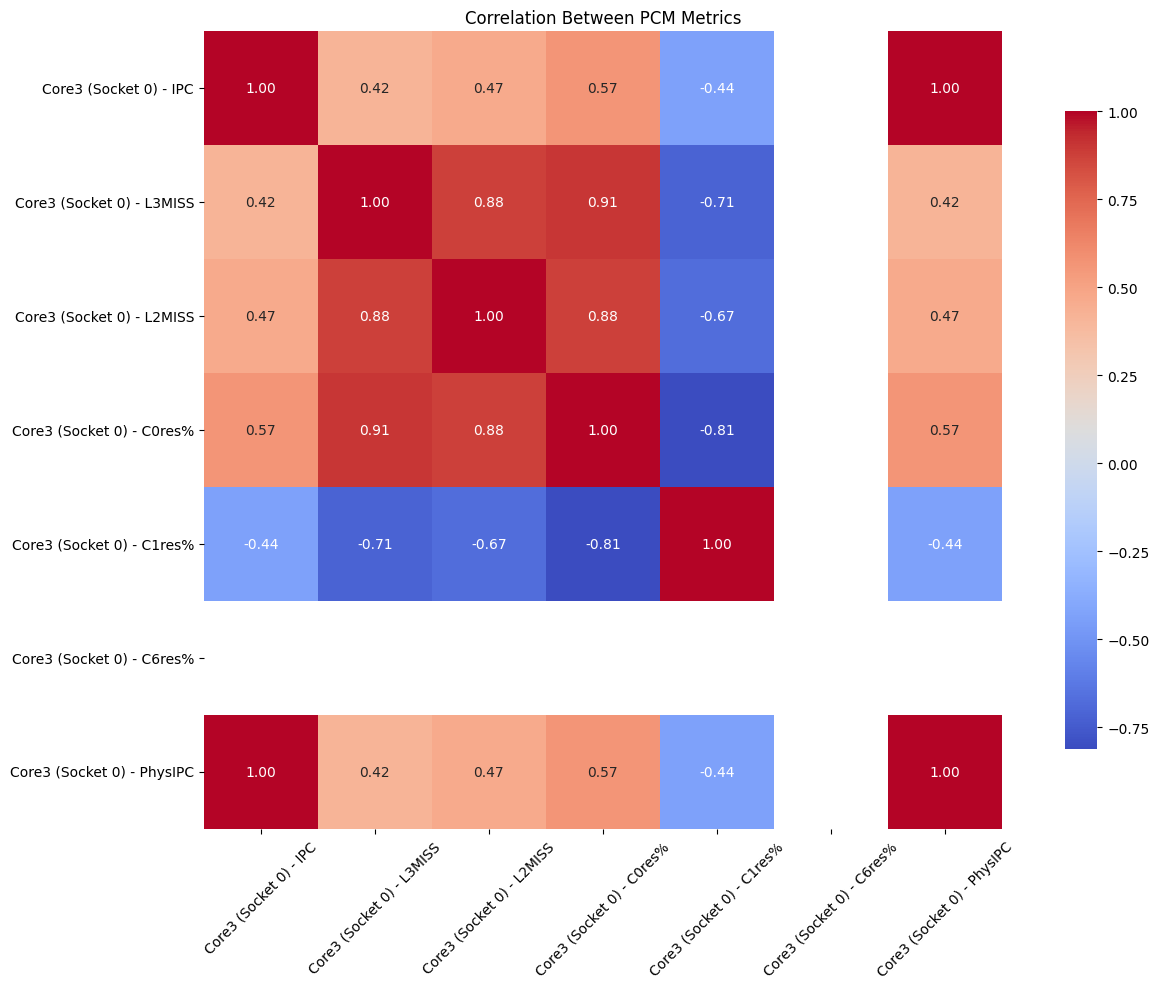

In [12]:
plot_pcm_corr(enriched_data, [
    'Core3 (Socket 0) - IPC',
    'Core3 (Socket 0) - L3MISS',
    'Core3 (Socket 0) - L2MISS',
    'Core3 (Socket 0) - C0res%',
    'Core3 (Socket 0) - C1res%',
    'Core3 (Socket 0) - C6res%',
    'Core3 (Socket 0) - PhysIPC'
])


## Distribution Analysis

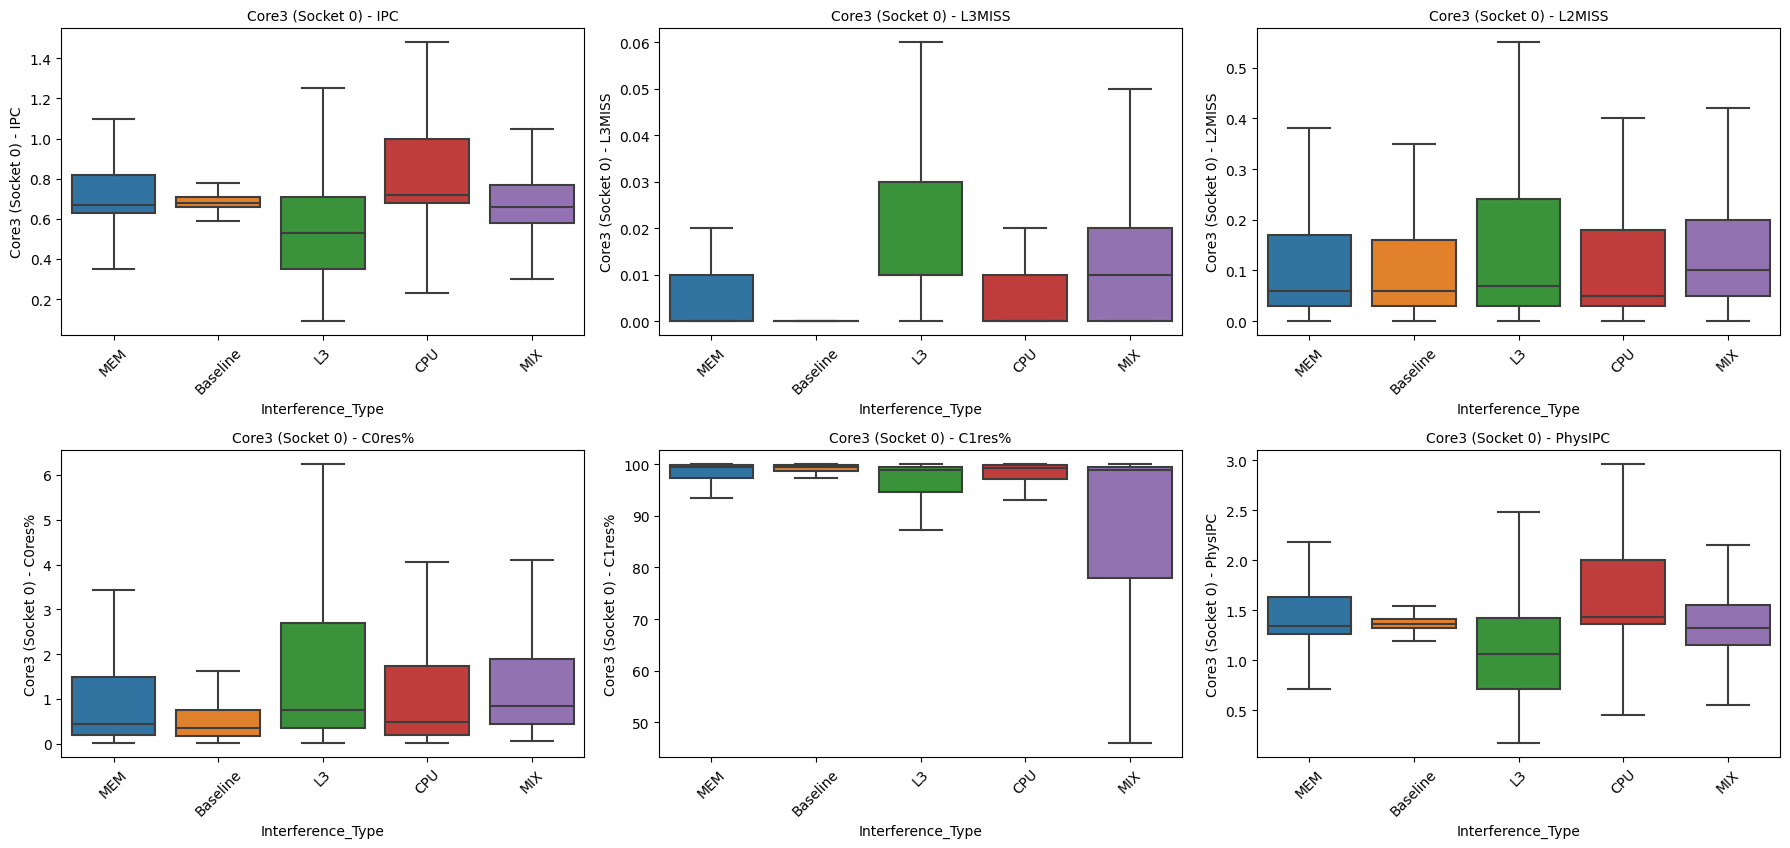

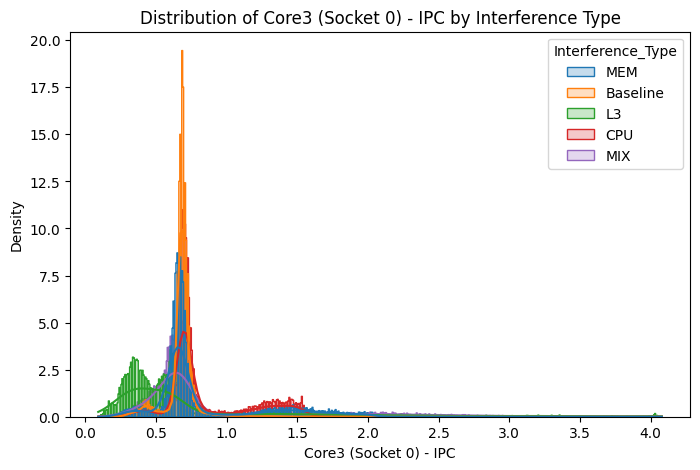

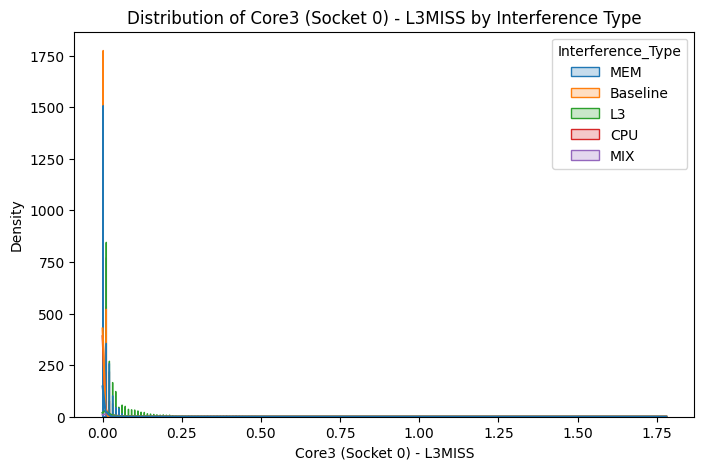

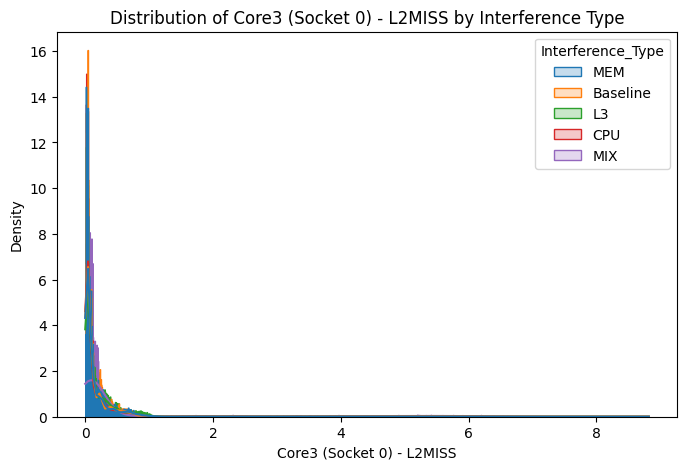

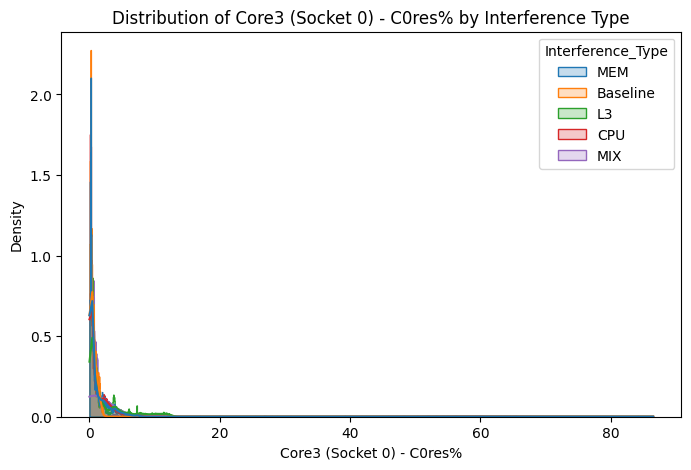

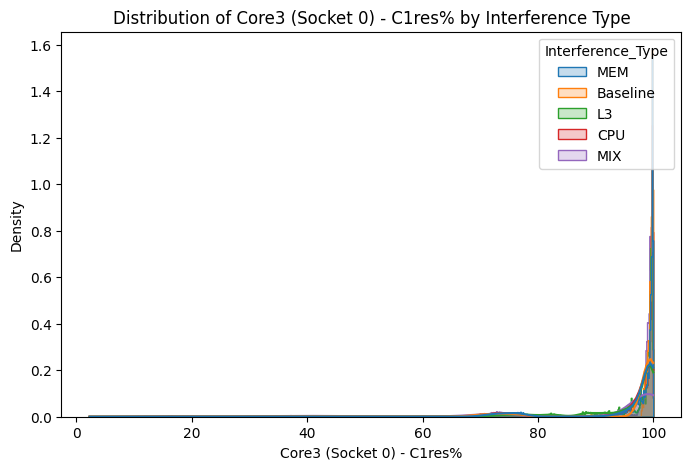

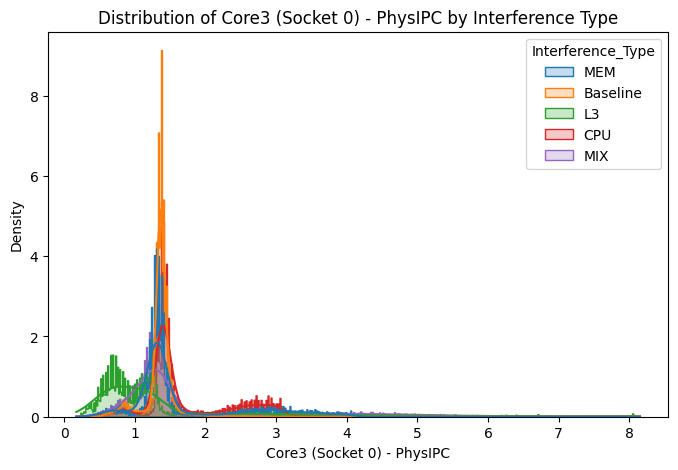

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pick representative PCM metrics
metrics = [
    "Core3 (Socket 0) - IPC",
    "Core3 (Socket 0) - L3MISS",
    "Core3 (Socket 0) - L2MISS",
    "Core3 (Socket 0) - C0res%",
    "Core3 (Socket 0) - C1res%",
    #"Core3 (Socket 0) - C6res%",
    "Core3 (Socket 0) - PhysIPC"
]

# --- 1. Boxplots per metric grouped by interference type ---
plt.figure(figsize=(18, 12))
for i, metric in enumerate(metrics, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x="Interference_Type", y=metric, data=enriched_data, showfliers=False)
    plt.title(metric, fontsize=10)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# --- 2. Histograms with KDE overlays ---
for metric in metrics:
    plt.figure(figsize=(8, 5))
    sns.histplot(data=enriched_data, x=metric, hue="Interference_Type", kde=True, element="step", stat="density", common_norm=False)
    plt.title(f"Distribution of {metric} by Interference Type")
    plt.show()


### Comments
The boxplots of representative PCM metrics across interference types reveal distinct 
distributional patterns. For example, IPC decreases and becomes more variable under CPU 
and L3 interference, while L3MISS exhibits heavy tails only in the L3 case, and C1res% 
shows a wide spread under Mixed interference. These findings demonstrate that the 
distributions are often skewed, with significant variability and occasional extreme values. 
If we relied solely on the mean, such tails and fluctuations would be hidden. By also 
including the standard deviation (to capture variability) and the p95 (to capture 
worst-case conditions), the analysis ensures that both typical and extreme interference 
effects are preserved in the features used for model training.


## Variability Analysis

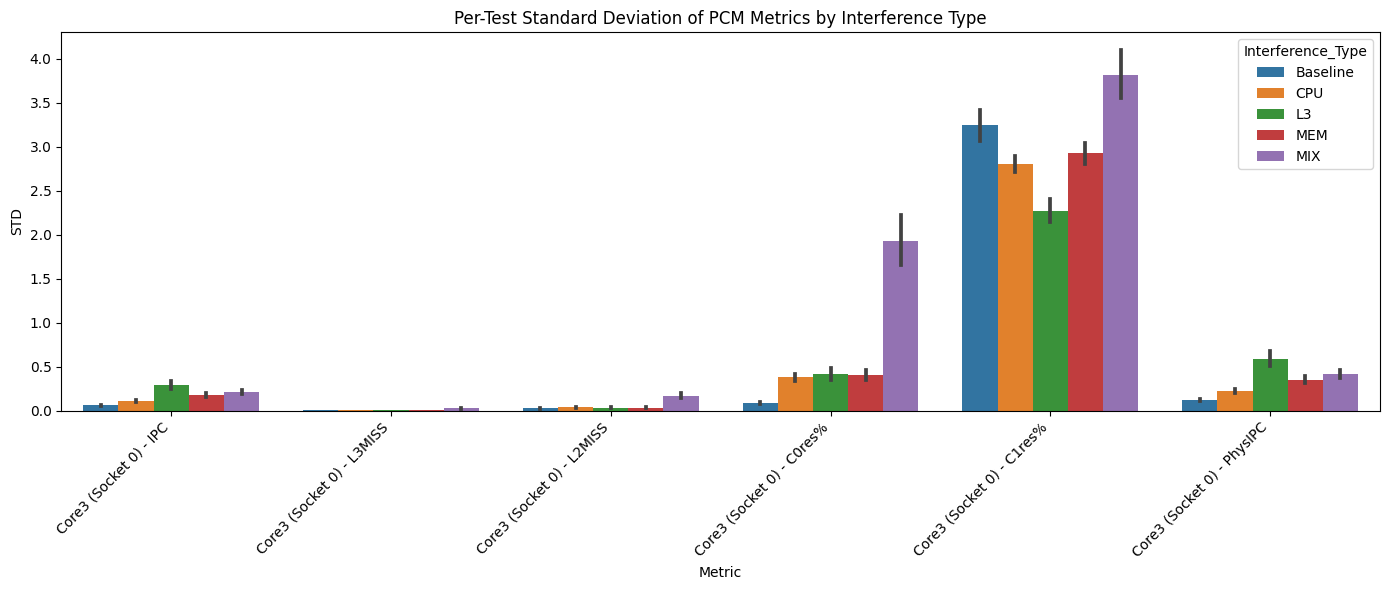

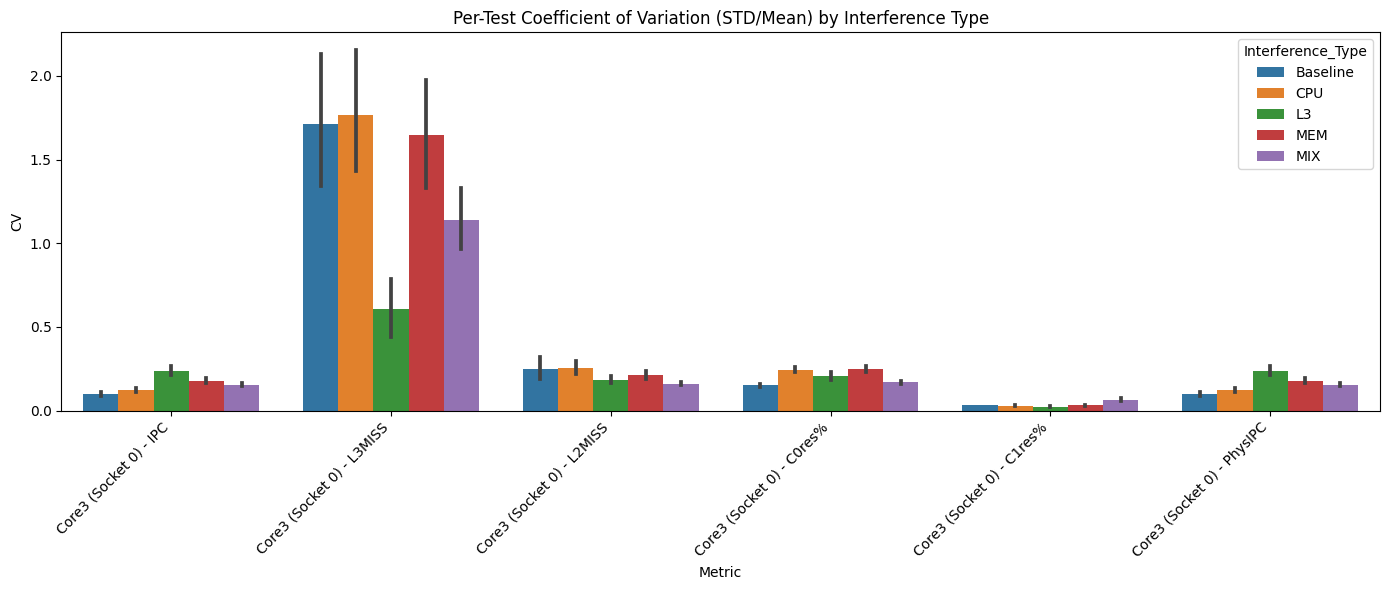


Top variability by STD:

Baseline — by STD
  Interference_Type                      Metric       STD
1          Baseline   Core3 (Socket 0) - C1res%  3.248808
5          Baseline  Core3 (Socket 0) - PhysIPC  0.124160
0          Baseline   Core3 (Socket 0) - C0res%  0.083770
2          Baseline      Core3 (Socket 0) - IPC  0.062192
3          Baseline   Core3 (Socket 0) - L2MISS  0.026741

CPU — by STD
   Interference_Type                      Metric       STD
7                CPU   Core3 (Socket 0) - C1res%  2.797916
6                CPU   Core3 (Socket 0) - C0res%  0.379940
11               CPU  Core3 (Socket 0) - PhysIPC  0.221654
8                CPU      Core3 (Socket 0) - IPC  0.110854
9                CPU   Core3 (Socket 0) - L2MISS  0.037955

L3 — by STD
   Interference_Type                      Metric       STD
13                L3   Core3 (Socket 0) - C1res%  2.272905
17                L3  Core3 (Socket 0) - PhysIPC  0.591532
12                L3   Core3 (Socket 0) - C0res%  

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ---------- Select PCM metric columns ----------
# We’ll include all cores/sockets that contain these substrings:
SUBS = [" - IPC", " - L2MISS", " - L3MISS", " - C0res%", " - C1res%", " - C6res%", " - PhysIPC"]
pcm_cols = [c for c in enriched_data.columns if any(s in c for s in SUBS)]

# Safety: keep only numeric
num_cols = [c for c in pcm_cols if pd.api.types.is_numeric_dtype(enriched_data[c])]

# ---------- Per-test (UniqueID) variability ----------
# Compute per-test mean & std (we'll need both; CV = std/mean)
g = enriched_data.groupby(["UniqueID", "Interference_Type"])
per_test_mean = g[num_cols].mean()
per_test_std  = g[num_cols].std(ddof=1)  # sample std

# Coefficient of Variation (scale-free variability). Add small epsilon to avoid div-by-zero.
eps = 1e-12
per_test_cv = per_test_std / (per_test_mean.abs() + eps)

# ---------- Long format for plotting ----------
std_long = per_test_std.reset_index().melt(
    id_vars=["UniqueID", "Interference_Type"],
    var_name="Metric", value_name="STD"
)

cv_long = per_test_cv.reset_index().melt(
    id_vars=["UniqueID", "Interference_Type"],
    var_name="Metric", value_name="CV"
)

# Optional: keep only a few representative metrics for clarity in the main text
rep_metrics = [
    "Core3 (Socket 0) - IPC",
    "Core3 (Socket 0) - L3MISS",
    "Core3 (Socket 0) - L2MISS",
    "Core3 (Socket 0) - C0res%",
    "Core3 (Socket 0) - C1res%",
    "Core3 (Socket 0) - PhysIPC",
]
std_plot = std_long[std_long["Metric"].isin(rep_metrics)]
cv_plot  = cv_long[cv_long["Metric"].isin(rep_metrics)]

# ---------- Barplots: mean STD by interference type ----------
plt.figure(figsize=(14, 6))
sns.barplot(
    data=std_plot,
    x="Metric", y="STD", hue="Interference_Type",
    estimator="mean", errorbar="ci", dodge=True
)
plt.title("Per-Test Standard Deviation of PCM Metrics by Interference Type")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# ---------- Barplots: mean CV by interference type ----------
plt.figure(figsize=(14, 6))
sns.barplot(
    data=cv_plot,
    x="Metric", y="CV", hue="Interference_Type",
    estimator="mean", errorbar="ci", dodge=True
)
plt.title("Per-Test Coefficient of Variation (STD/Mean) by Interference Type")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# ---------- (Optional) Ranking tables to inspect strongest variability ----------
# Average STD per metric & interference type
avg_std = std_plot.groupby(["Interference_Type", "Metric"])["STD"].mean().reset_index()
avg_cv  = cv_plot.groupby(["Interference_Type", "Metric"])["CV"].mean().reset_index()

# Top-5 metrics by variability for each interference type (printed to console)
for df, name in [(avg_std, "STD"), (avg_cv, "CV")]:
    print(f"\nTop variability by {name}:")
    for itype, sub in df.groupby("Interference_Type"):
        print(f"\n{itype} — by {name}")
        print(sub.sort_values(by=name, ascending=False).head(5))


### Variability Analysis.
The analysis of distributional patterns and per-test variability provides a clearer view of how hardware counters respond to different forms of interference. Certain metrics exhibit strong and discriminative reactions: for instance, IPC decreases under CPU and L3 stress with substantially wider spread than in baseline, while L3MISS remains negligible in baseline runs but becomes highly irregular and bursty under L3 interference. C-state residencies, especially C1res%, show significant fluctuations in mixed scenarios, reflecting shifts in system activity without being tied to a single resource bottleneck. In contrast, other metrics such as L2MISS display little separation and contribute weakly to interference detection. These findings indicate that no single metric is sufficient; interference leaves a “fingerprint” across multiple counters.

From this perspective, different summary statistics capture complementary aspects of the signal. The mean captures the central shift in IPC or L3MISS between baseline and stressed conditions. The standard deviation quantifies instability, which is particularly relevant when interference increases fluctuations rather than shifting the level alone (e.g., IPC under CPU interference). The high-percentile values (p95/p99) capture rare but performance-critical bursts, especially in metrics such as cache misses where averages underestimate their true impact. Together, these three statistics allow us to represent both the typical behavior and the critical deviations that are most relevant to latency degradation. Consequently, while not every counter benefits equally from all three statistics, using a combination of mean, standard deviation, and a tail percentile offers a pragmatic and interpretable feature set that reflects the heterogeneous ways in which interference manifests in hardware metrics.

## Tails / Extremes (p95 vs. Mean)

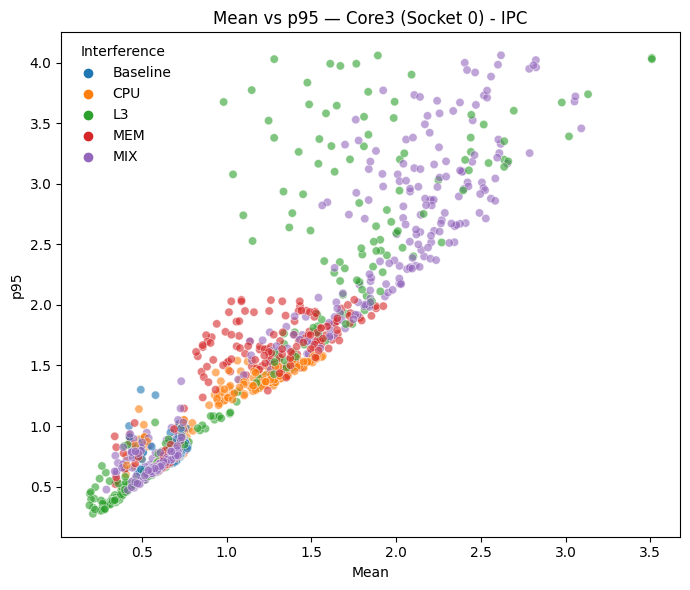

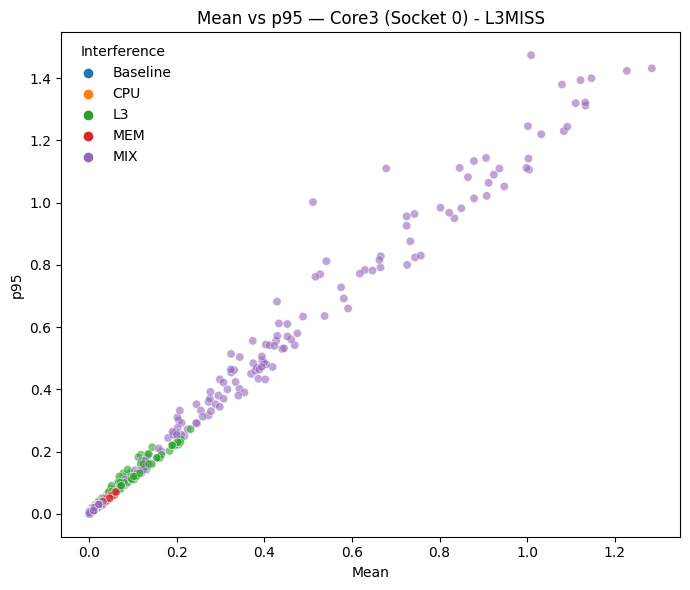

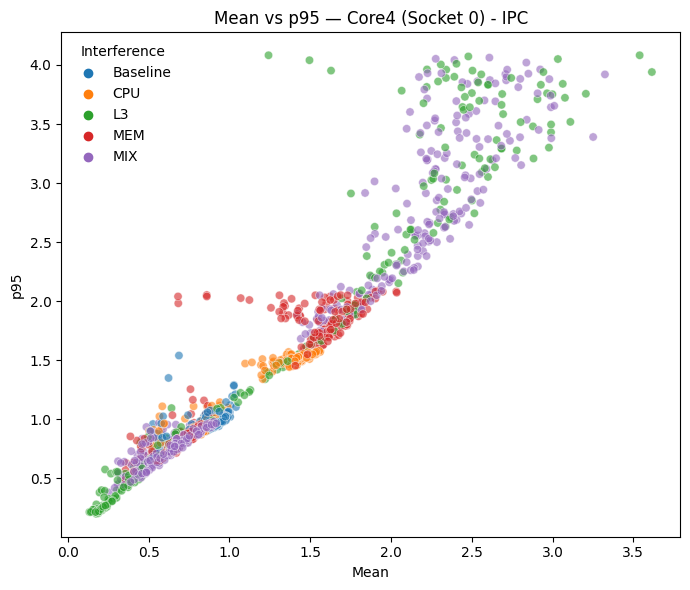

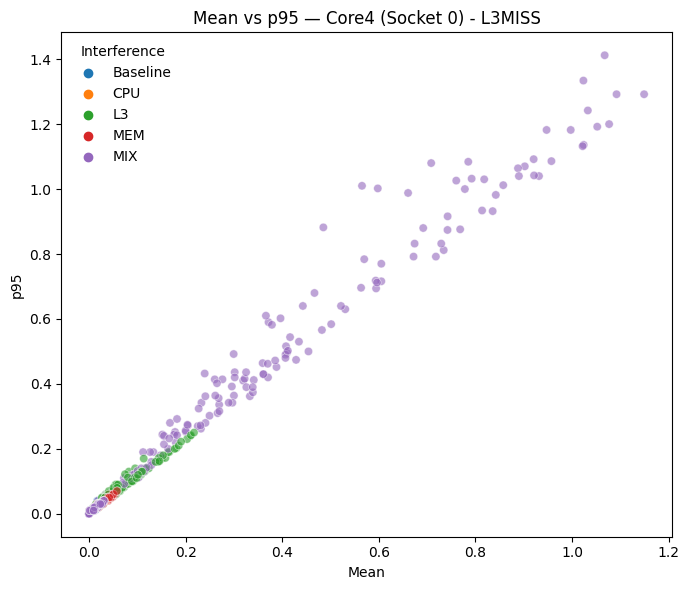

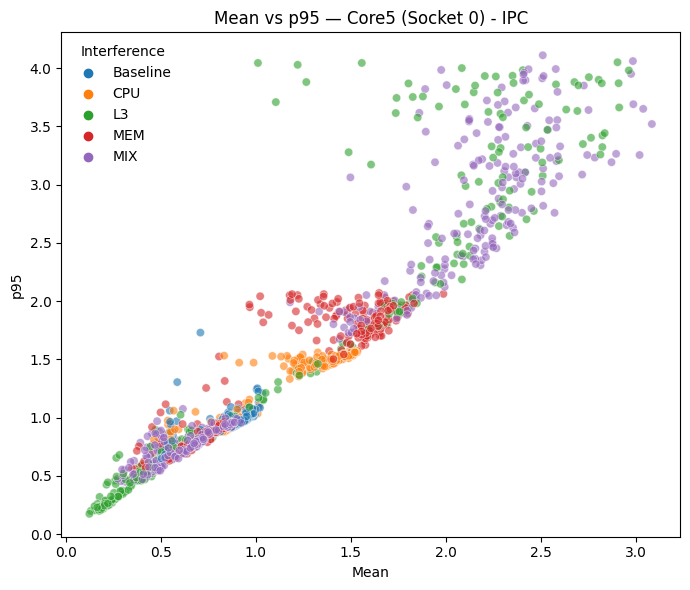

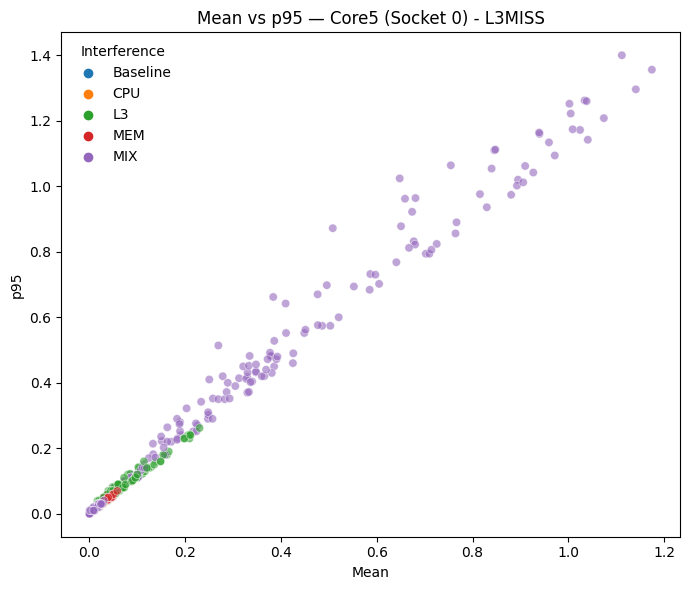

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ---------- 1) Pick metrics ----------
SUBS = [" - IPC", " - L3MISS"]   # add more if you like
pcm_cols = [c for c in enriched_data.columns if any(s in c for s in SUBS)]

# Coerce to numeric to avoid dtype issues
df = enriched_data.copy()
for c in pcm_cols:
    df[c] = pd.to_numeric(df[c], errors="coerce")

# ---------- 2) Define p95 function ----------
def p95(x):
    return x.quantile(0.95)
p95.__name__ = "p95"

# ---------- 3) Group per test (UniqueID) ----------
agg = (
    df.groupby(["UniqueID", "Interference_Type"])[pcm_cols]
      .agg(["mean", p95])     # only mean + p95
)

# Flatten MultiIndex columns
agg.columns = [f"{metric}_{stat}" for metric, stat in agg.columns]
agg = agg.reset_index()

# ---------- 4) Scatterplots: mean vs p95 ----------
for metric in pcm_cols:
    x_mean = f"{metric}_mean"
    y_p95  = f"{metric}_p95"

    if not set([x_mean, y_p95]).issubset(agg.columns):
        continue

    plt.figure(figsize=(7, 6))
    sns.scatterplot(
        data=agg.dropna(subset=[x_mean, y_p95]),
        x=x_mean, y=y_p95,
        hue="Interference_Type",
        alpha=0.6
    )
    plt.title(f"Mean vs p95 — {metric}")
    plt.xlabel("Mean")
    plt.ylabel("p95")
    plt.legend(title="Interference", frameon=False)
    plt.tight_layout()
    plt.show()


These results indicate that tail statistics provide complementary information for burst-prone metrics such as IPC, but add little beyond the mean for more stable counters like L3MISS, reinforcing the selective use of p95 in the feature set.

## Correlation Analysis

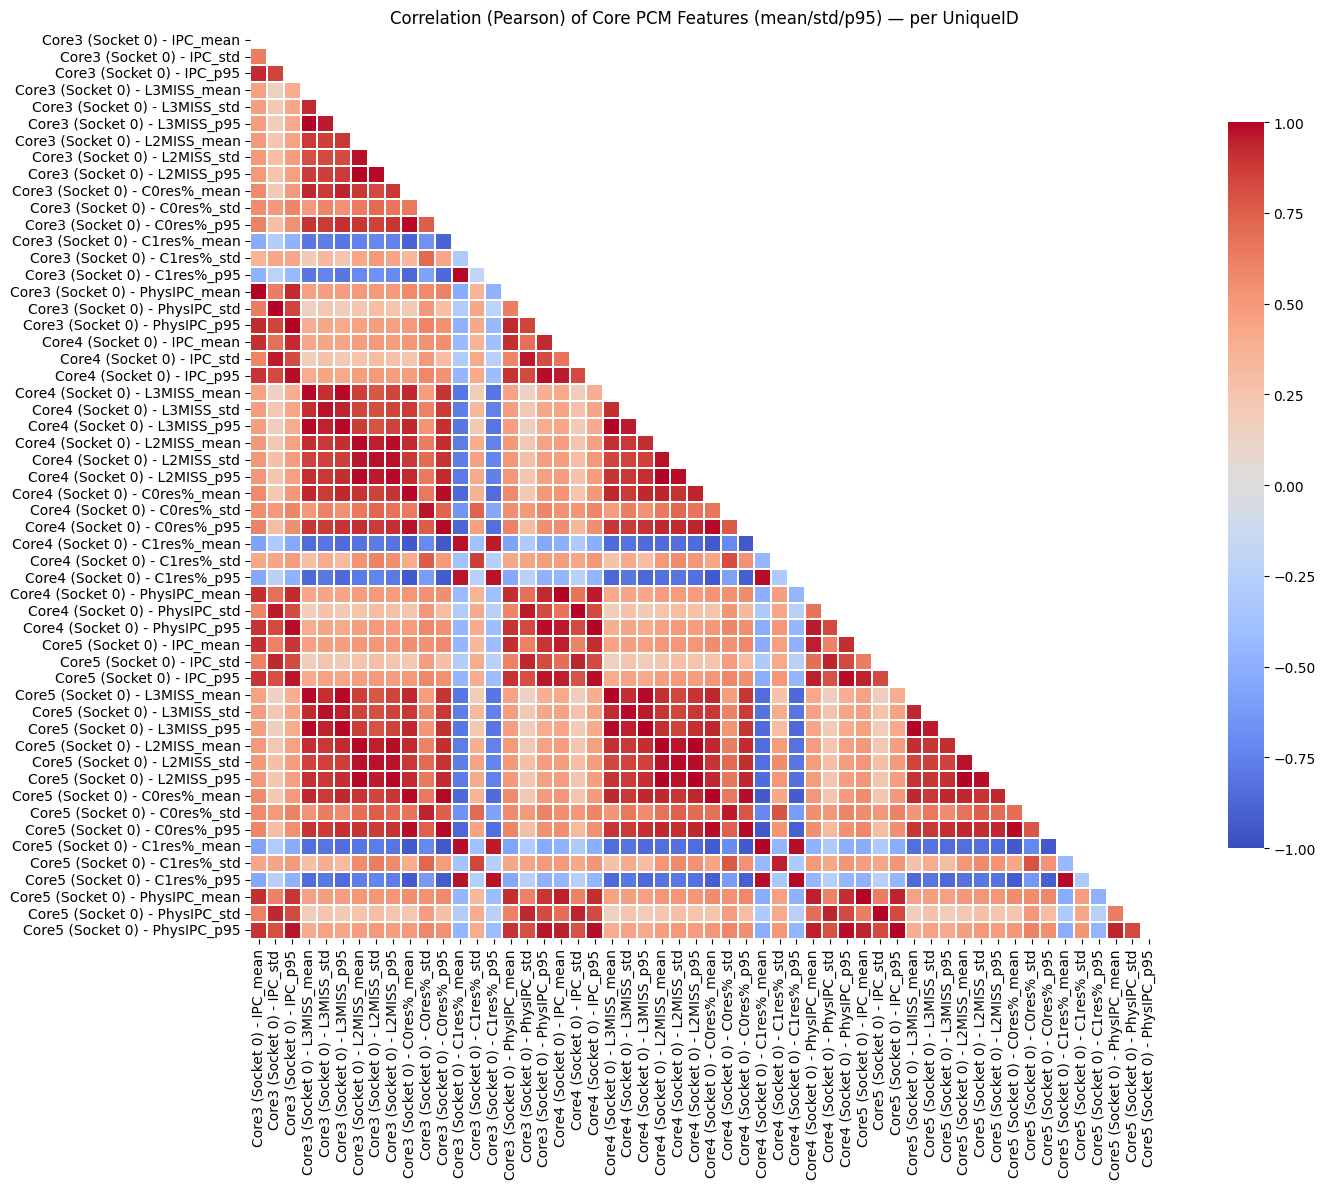

In [23]:
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# -----------------------------
# 1) Select ONLY per-core PCM metrics
#    e.g., "Core3 (Socket 0) - IPC"
# -----------------------------
CORE_METRIC_RE = re.compile(
    r"^Core\d+\s*\(Socket\s*\d+\)\s*-\s*(IPC|PhysIPC|L2MISS|L3MISS|C0res%|C1res%)$"
)

core_cols = [c for c in enriched_data.columns if CORE_METRIC_RE.match(c)]

# Coerce to numeric just in case
df = enriched_data.copy()
for c in core_cols:
    df[c] = pd.to_numeric(df[c], errors="coerce")

# -----------------------------
# 2) Aggregate per test (UniqueID)
# -----------------------------
def p95(x):
    return x.quantile(0.95)
p95.__name__ = "p95"

agg = (
    df.groupby(["UniqueID", "Interference_Type"])[core_cols]
      .agg(["mean", "std", p95])
)

# Flatten MultiIndex columns: "<metric>_<stat>"
agg.columns = [f"{m}_{s}" for m, s in agg.columns]
agg = agg.reset_index()

# Report columns that are constant across all tests (std==0 everywhere) or fully NaN
X = agg.drop(columns=["UniqueID", "Interference_Type"]).copy()
constant_cols = []
allna_cols = []
for col in X.columns:
    col_vals = X[col].values
    if np.all(np.isnan(col_vals)):
        allna_cols.append(col)
    elif np.nanstd(col_vals) == 0:
        constant_cols.append(col)

if constant_cols:
    print("\nColumns with zero variance across tests (correlations will be NaN):")
    for c in constant_cols: print("  ", c)
if allna_cols:
    print("\nColumns that are all-NaN (check upstream data types/aggregation):")
    for c in allna_cols: print("  ", c)

# -----------------------------
# 3) Correlation (Pearson) & Heatmap
# -----------------------------
corr = X.corr(method="pearson")  # columns remain; pairs with a constant column => NaN

# mask upper triangle for readability
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(16, 12))
sns.heatmap(
    corr, mask=mask, vmin=-1, vmax=1, center=0,
    cmap="coolwarm", square=True, linewidths=.3, cbar_kws={"shrink": .8}
)
plt.title("Correlation (Pearson) of Core PCM Features (mean/std/p95) — per UniqueID")
plt.xticks(rotation=90); plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


## Representative Time Series (Aggregation Justification)

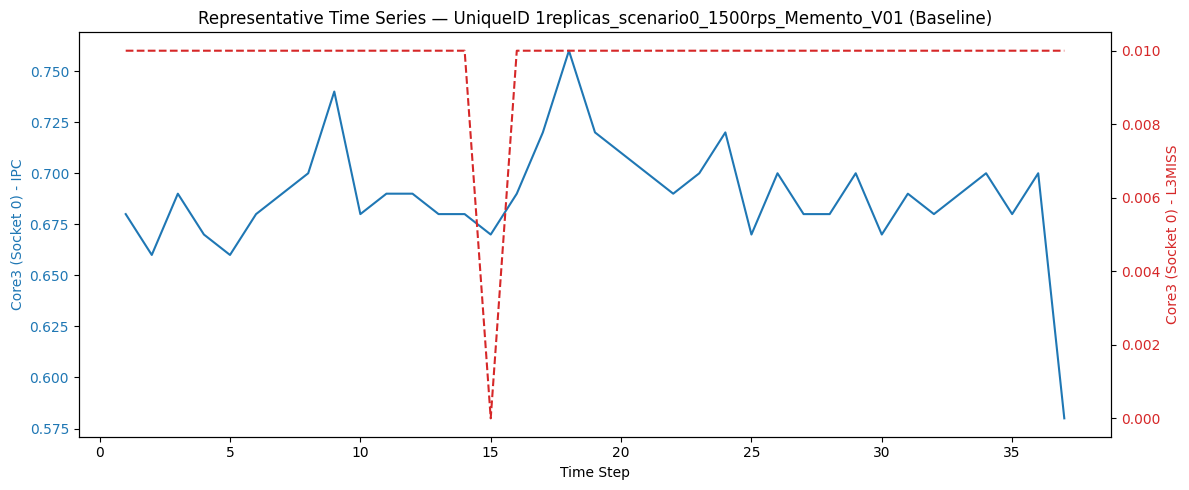

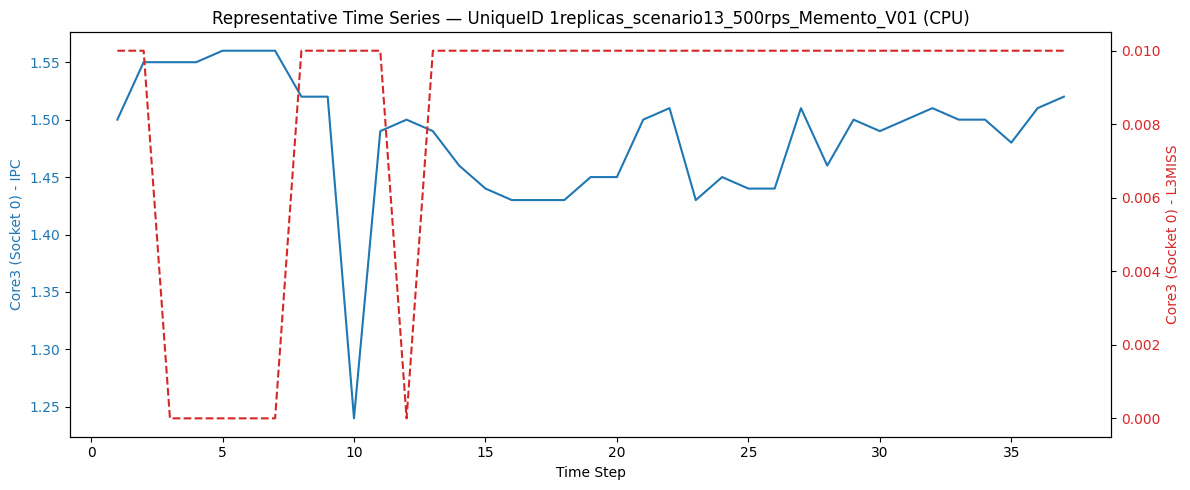

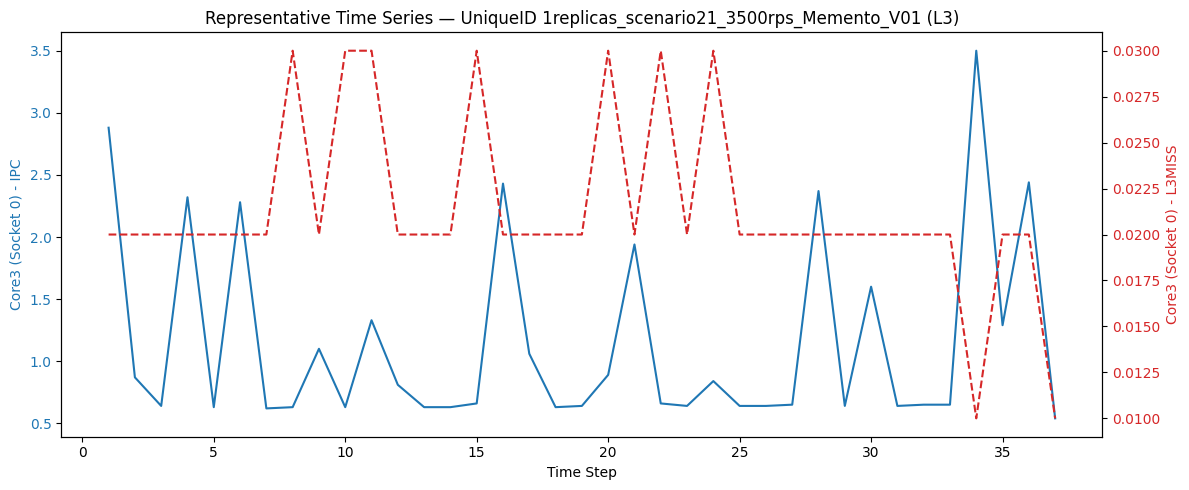

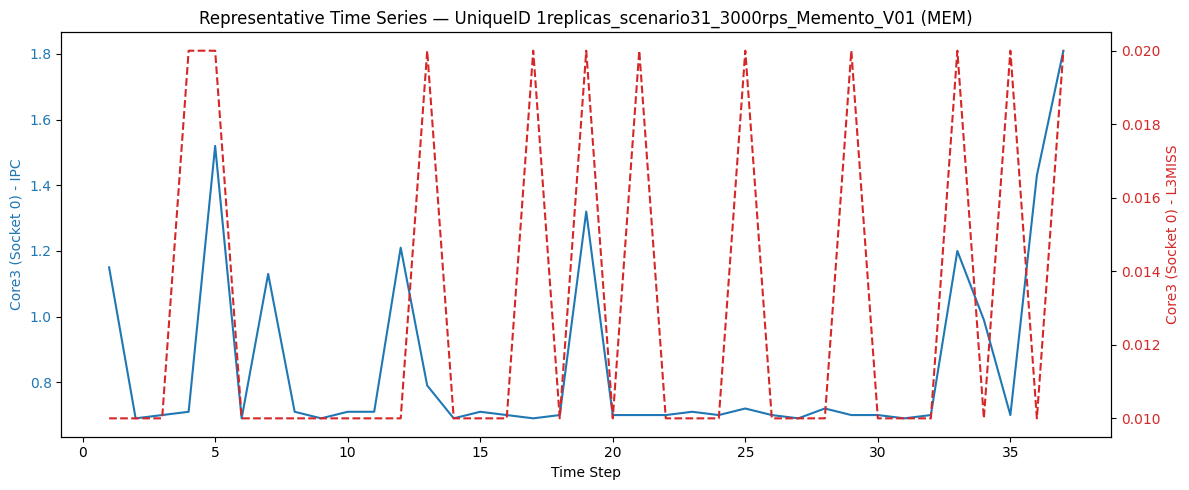

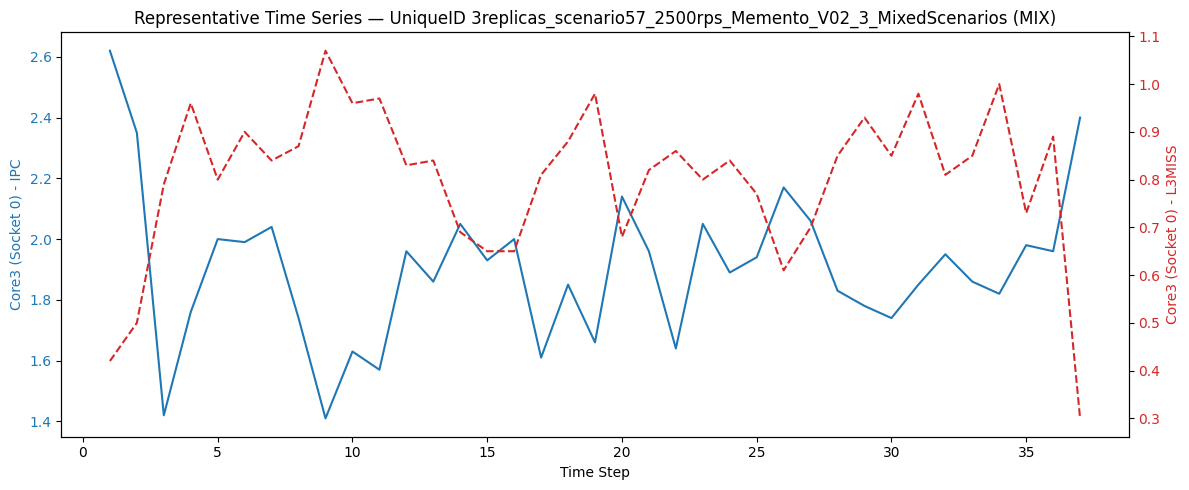

In [28]:
import matplotlib.pyplot as plt

# Choose one representative UniqueID per interference type
sample_ids = (
    enriched_data.groupby("Interference_Type")["UniqueID"]
    .first()
    .values
)

# Metrics to plot (IPC on left axis, L3MISS on right axis)
metric_ipc = "Core3 (Socket 0) - IPC"
metric_l3  = "Core3 (Socket 0) - L3MISS"

for uid in sample_ids:
    df_sub = enriched_data[enriched_data["UniqueID"] == uid]
    itype = df_sub["Interference_Type"].iloc[0]
    
    fig, ax1 = plt.subplots(figsize=(12, 5))

    # Left axis: IPC
    ax1.plot(df_sub["Time_Step"], df_sub[metric_ipc], color="tab:blue", label=metric_ipc)
    ax1.set_xlabel("Time Step")
    ax1.set_ylabel(metric_ipc, color="tab:blue")
    ax1.tick_params(axis="y", labelcolor="tab:blue")

    # Right axis: L3MISS
    ax2 = ax1.twinx()
    ax2.plot(df_sub["Time_Step"], df_sub[metric_l3], color="tab:red", linestyle="--", label=metric_l3)
    ax2.set_ylabel(metric_l3, color="tab:red")
    ax2.tick_params(axis="y", labelcolor="tab:red")

    # Title and layout
    plt.title(f"Representative Time Series — UniqueID {uid} ({itype})")
    fig.tight_layout()
    plt.show()


## Getting Final Feature Set

In [30]:
import re
import numpy as np
import pandas as pd

# -----------------------------
# 1) Helper: keep only per-core PCM metrics
# -----------------------------
CORE_METRIC_RE = re.compile(
    r"^Core\d+\s*\(Socket\s*\d+\)\s*-\s*(IPC|PhysIPC|L2MISS|L3MISS|C0res%|C1res%|C6res%)$"
)

def build_aggregated_features(enriched_data, stats=("mean", "std", "p95")):
    df = enriched_data.copy()
    metric_cols = [c for c in df.columns if CORE_METRIC_RE.match(c)]
    for c in metric_cols:
        df[c] = pd.to_numeric(df[c], errors="coerce")

    def p95(x): return x.quantile(0.95)
    p95.__name__ = "p95"

    agg_funcs = []
    for s in stats:
        if s == "p95":
            agg_funcs.append(p95)
        else:
            agg_funcs.append(s)

    grouped = (
        df.groupby(["UniqueID", "Interference_Type"])[metric_cols]
          .agg(agg_funcs)
    )
    grouped.columns = [f"{m}_{s}" for m, s in grouped.columns]
    return grouped.reset_index()

# -----------------------------
# 2) Drop all-NA and zero-variance
# -----------------------------
def drop_non_informative(X: pd.DataFrame):
    allna, zerovar = [], []
    for c in X.columns:
        vals = X[c].values
        if np.all(np.isnan(vals)):
            allna.append(c)
        elif np.nanstd(vals) == 0.0:
            zerovar.append(c)
    keep = [c for c in X.columns if c not in set(allna + zerovar)]
    return X[keep], allna, zerovar

# -----------------------------
# 3) Relaxed prune of correlated features
# -----------------------------
def prune_correlated(X: pd.DataFrame, threshold=0.98, prefer_rules=None):
    corr = X.corr(method="pearson").abs()
    upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
    to_drop = set()

    # group features by core to safeguard
    core_groups = {}
    for c in X.columns:
        core_id = c.split()[0]  # e.g., "Core3"
        core_groups.setdefault(core_id, []).append(c)

    def choose_drop(a, b):
        # user-defined rules
        if prefer_rules:
            for keep_kw, drop_kw in prefer_rules:
                if (keep_kw in a and drop_kw in b):
                    return b
                if (keep_kw in b and drop_kw in a):
                    return a
        # fallback: drop the one with higher overall correlation sum
        a_sum = np.nansum(upper[a].values)
        b_sum = np.nansum(upper[b].values)
        return a if a_sum >= b_sum else b

    pairs = (
        upper.stack()
             .reset_index()
             .sort_values(0, ascending=False)
    )

    for a, b, r in pairs.to_numpy():
        if r < threshold:
            break
        if a in to_drop or b in to_drop:
            continue
        # safeguard: don’t drop all features of a core
        a_core, b_core = a.split()[0], b.split()[0]
        if len([f for f in core_groups[a_core] if f not in to_drop]) <= 1:
            continue
        if len([f for f in core_groups[b_core] if f not in to_drop]) <= 1:
            continue
        drop_col = choose_drop(a, b)
        to_drop.add(drop_col)

    kept = [c for c in X.columns if c not in to_drop]
    return X[kept], sorted(list(to_drop))

# -----------------------------
# 4) Main function
# -----------------------------
def select_training_features(
    enriched_data,
    stats=("mean", "std", "p95"),
    corr_threshold=0.98,  # more relaxed
    prefer_rules=(("IPC_", "PhysIPC_"),)
):
    agg = build_aggregated_features(enriched_data, stats=stats)
    ids = agg[["UniqueID", "Interference_Type"]].copy()
    X = agg.drop(columns=["UniqueID", "Interference_Type"])

    X1, allna, zerovar = drop_non_informative(X)
    X2, dropped_corr = prune_correlated(X1, threshold=corr_threshold, prefer_rules=prefer_rules)

    print("Dropped all-NA:", allna)
    print("Dropped zero-variance:", zerovar)
    print("Dropped for correlation:", dropped_corr)
    print("Final feature count:", len(X2.columns))

    return ids, X2

# -----------------------------
# Example usage
# -----------------------------
ids, X = select_training_features(enriched_data)

print("\nSelected features:")
print(X.columns.tolist()[:20])  # preview first 20


Dropped all-NA: []
Dropped zero-variance: ['Core3 (Socket 0) - C6res%_mean', 'Core3 (Socket 0) - C6res%_std', 'Core3 (Socket 0) - C6res%_p95', 'Core4 (Socket 0) - C6res%_mean', 'Core4 (Socket 0) - C6res%_std', 'Core4 (Socket 0) - C6res%_p95', 'Core5 (Socket 0) - C6res%_mean', 'Core5 (Socket 0) - C6res%_std', 'Core5 (Socket 0) - C6res%_p95']
Dropped for correlation: ['Core3 (Socket 0) - C0res%_p95', 'Core3 (Socket 0) - C1res%_p95', 'Core3 (Socket 0) - L2MISS_p95', 'Core3 (Socket 0) - L3MISS_p95', 'Core3 (Socket 0) - PhysIPC_mean', 'Core3 (Socket 0) - PhysIPC_p95', 'Core3 (Socket 0) - PhysIPC_std', 'Core4 (Socket 0) - C0res%_mean', 'Core4 (Socket 0) - C0res%_p95', 'Core4 (Socket 0) - C1res%_p95', 'Core4 (Socket 0) - L2MISS_mean', 'Core4 (Socket 0) - L2MISS_p95', 'Core4 (Socket 0) - L3MISS_mean', 'Core4 (Socket 0) - L3MISS_p95', 'Core4 (Socket 0) - PhysIPC_mean', 'Core4 (Socket 0) - PhysIPC_p95', 'Core4 (Socket 0) - PhysIPC_std', 'Core5 (Socket 0) - C0res%_mean', 'Core5 (Socket 0) - C0res

In [34]:
# Store to Json the names of the selected features after you change the names. For example "Core3 (Socket 0) - IPC_mean" should be changed to "mean_Core3_IPC"
import json
import re

def rename_feature(feat_name: str) -> str:
    """
    Convert 'Core3 (Socket 0) - IPC_mean' -> 'mean_Core3_IPC'
    Works also for std and p95.
    """
    # split into base and stat
    if "_" not in feat_name:
        return feat_name
    base, stat = feat_name.rsplit("_", 1)

    # extract Core and Metric
    m = re.match(r"(Core\d+).*-\s*(\w+)", base)
    if m:
        core = m.group(1)           # e.g. Core3
        metric = m.group(2)         # e.g. IPC, L3MISS
        return f"{stat}_{core}_{metric}"
    else:
        return f"{stat}_{base}"     # fallback if regex fails

# Apply renaming to your selected features
renamed_features = [rename_feature(f) for f in X.columns]

# Save to JSON file
with open("selected_features.json", "w") as f:
    json.dump(renamed_features, f, indent=2)

print("Saved feature names to selected_features.json")
print(renamed_features[:10])  # preview first 10


Saved feature names to selected_features.json
['mean_Core3_IPC', 'std_Core3_IPC', 'p95_Core3_IPC', 'mean_Core3_L3MISS', 'std_Core3_L3MISS', 'mean_Core3_L2MISS', 'std_Core3_L2MISS', 'mean_Core3_C0res', 'std_Core3_C0res', 'mean_Core3_C1res']
